In [2]:
##Importing Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
##Loading and Eploring Dataset
df = pd.read_csv('Iris.csv')
df.info()
df['Species'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [12]:
##Normalization of Feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
##Splittign Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [16]:
##Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
##Predicting and Evaluating
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



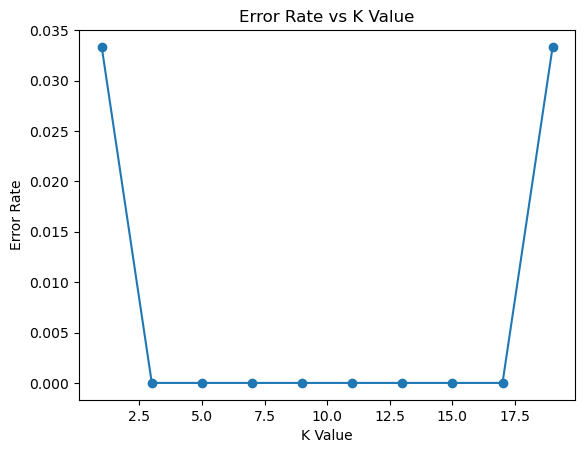

In [20]:
##With Different K
errors = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

plt.plot(range(1, 20, 2), errors, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value')
plt.show()

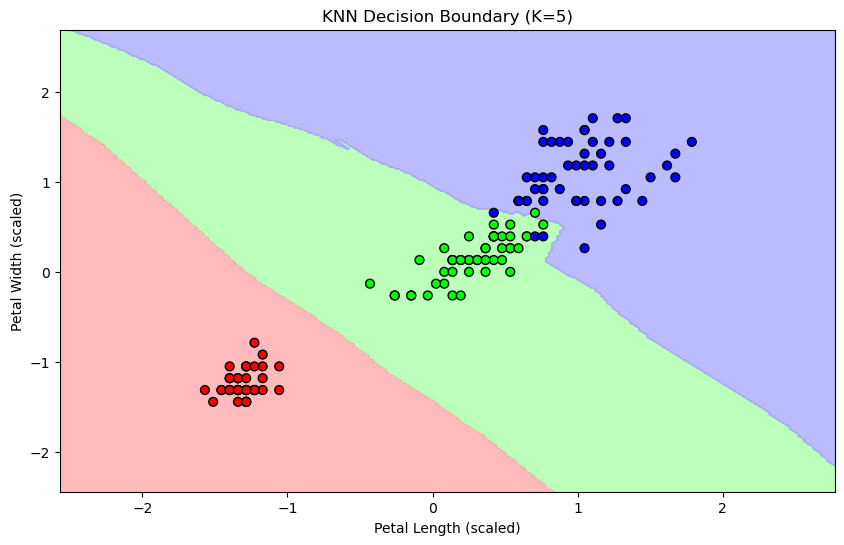

In [26]:
##Visuvalizing Decision Boundries
# Use only 2 features for boundary plot
X_simple = df[['PetalLengthCm', 'PetalWidthCm']].values
y_simple = df['Species']

# Encode y to numeric for plotting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_simple_encoded = le.fit_transform(y_simple)

# Scale
X_simple_scaled = scaler.fit_transform(X_simple)

# Train KNN
knn_simple = KNeighborsClassifier(n_neighbors=5)
knn_simple.fit(X_simple_scaled, y_simple_encoded)

# Plot
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
x_min, x_max = X_simple_scaled[:, 0].min() - 1, X_simple_scaled[:, 0].max() + 1
y_min, y_max = X_simple_scaled[:, 1].min() - 1, X_simple_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X_simple_scaled[:, 0], X_simple_scaled[:, 1], c=y_simple_encoded,
            cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=40)
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('KNN Decision Boundary (K=5)')
plt.show()